# Exploratory Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
from sklearn.model_selection import train_test_split
import pickle
import os

In [2]:
pd.set_option('display.max_columns', None)
current_dir = os.getcwd()

### Exploración y limpieza de datos

In [26]:
url_data = os.path.join(current_dir, "../data/raw/Dataframe_Final_Data.csv")
data = pd.read_csv(url_data, sep = ',')
data.head()

,CategoryID,CategoryName,ProductName,Price,Class,ModifyDate,Resistant,IsAllergic,VitalityDays,SalesID,CustomerID,Quantity,ProductID,Discount,Date,TransactionNumber,FirstName,MiddleInitial,LastName,CityID,Address,CityName,Zipcode,CountryID,CountryName,CountryCode,State,pib,rpc,wti,Unemployment_Rate,Population_2018,personal_income,Crecimiento_poblacional,Total_price
0,1,Confections,"Spoon - Soup, Plastic",32.442,Low,2017-03-03 09:47:09.310,Weak,True,0.0,12630,24490,7,15,0.0,2018-01-01,5BSK7H5X44DGRUWEKJEA,Jill,P,Soto,14,31 New Parkway,Indianapolis,81678,32,United States,AR,Indiana,1.225389e+14,1.534967e+10,4.628095,3.8,6695497.0,3.403557e+06,0.56,227.09
1,1,Confections,"Spoon - Soup, Plastic",32.442,Low,2017-03-03 09:47:09.310,Weak,True,0.0,115884,95026,25,15,0.0,2018-01-01,3Q0RRIMLEEIMZ4U2G347,Pamela,Z,Estrada,4,949 Milton Drive,Fremont,20641,32,United States,AR,California,9.364726e+14,1.991167e+10,4.628095,4.8,39461588.0,4.156992e+07,0.26,811.05
2,1,Confections,"Spoon - Soup, Plastic",32.442,Low,2017-03-03 09:47:09.310,Weak,True,0.0,217388,27676,8,15,0.0,2018-01-01,T2ZK8X0HU1KWKPRQ5MUQ,Anita,B,Sanchez,10,30 West Milton Way,Toledo,52048,32,United States,AR,Ohio,2.175128e+14,1.570400e+10,4.628095,5.2,11676341.0,6.392306e+06,0.14,259.54
3,1,Confections,"Spoon - Soup, Plastic",32.442,Low,2017-03-03 09:47:09.310,Weak,True,0.0,364759,11630,3,15,0.2,2018-01-01,ILPQKU2EBTVNMTN7FQNL,Dustin,B,Coffey,40,904 Oak Parkway,Cleveland,51352,32,United States,AR,Ohio,2.175128e+14,1.570400e+10,4.628095,5.2,11676341.0,6.392306e+06,0.14,77.86
4,1,Confections,"Spoon - Soup, Plastic",32.442,Low,2017-03-03 09:47:09.310,Weak,True,0.0,447481,83733,22,15,0.2,2018-01-01,TI5RNV3CZM39NW16FG9M,Bridgette,X,Valenzuela,44,52 Rocky Second Drive,Memphis,73999,32,United States,AR,Tennessee,1.203899e+14,1.524400e+10,4.628095,3.8,6771631.0,3.328174e+06,0.94,570.98


In [27]:
# Obtener las dimensiones.
data.shape

(6690599, 35)

- Observamos los valores de la columna `State` y seleccionamos el estado de California como el más conveniente para el futuro entrenamiento del modelo. 

In [28]:
estados = data['State'].value_counts()
estados
# with open("estados.txt", "w") as f:
#     f.write(estados.to_string())

State
California              964619
Texas                   693918
Ohio                    418164
Florida                 351734
Arizona                 289566
New York                281045
North Carolina          212687
Colorado                210073
Alabama                 208431
Washington              207322
Virginia                205897
Louisiana               204668
Indiana                 148197
Oklahoma                141769
Tennessee               140370
New Jersey              140214
Wisconsin               139601
Kansas                  137887
Pennsylvania            137769
Nebraska                137091
Minnesota               137062
Michigan                135974
Hawaii                   72181
Mississippi              71777
Nevada                   71414
Arkansas                 71072
Oregon                   70944
Alaska                   70286
Missouri                 69927
New Mexico               69813
Iowa                     69655
Kentucky                 69353
Ma

In [81]:
california_data = data[data['State'].isin(['California', 'Washington', 'Hawaii', 'Oregon'])]

california_data.head()

,CategoryID,CategoryName,ProductName,Price,Class,ModifyDate,Resistant,IsAllergic,VitalityDays,SalesID,CustomerID,Quantity,ProductID,Discount,Date,TransactionNumber,FirstName,MiddleInitial,LastName,CityID,Address,CityName,Zipcode,CountryID,CountryName,CountryCode,State,pib,rpc,wti,Unemployment_Rate,Population_2018,personal_income,Crecimiento_poblacional,Total_price
1,1,Confections,"Spoon - Soup, Plastic",32.442,Low,2017-03-03 09:47:09.310,Weak,True,0.0,115884,95026,25,15,0.0,2018-01-01,3Q0RRIMLEEIMZ4U2G347,Pamela,Z,Estrada,4,949 Milton Drive,Fremont,20641,32,United States,AR,California,9.364726e+14,1.991167e+10,4.628095,4.8,39461588.0,4.156992e+07,0.26,811.05
5,1,Confections,"Spoon - Soup, Plastic",32.442,Low,2017-03-03 09:47:09.310,Weak,True,0.0,604014,61720,16,15,0.0,2018-01-01,0ASTLHBJ1UG3LY5R7TZZ,Robert,Q,Webb,88,736 Rocky New St.,Seattle,20135,32,United States,AR,Washington,1.842721e+14,1.962367e+10,4.628095,5.2,7523869.0,1.157972e+07,1.35,519.07
17,1,Confections,"Spoon - Soup, Plastic",32.442,Low,2017-03-03 09:47:09.310,Weak,True,0.0,1405016,21680,6,15,0.0,2018-01-01,T0CO4XBV9MEOQO5N9GHW,Lillian,E,Collier,11,845 Green Hague Boulevard,Spokane,38103,32,United States,AR,Washington,1.842721e+14,1.962367e+10,4.628095,5.2,7523869.0,1.157972e+07,1.35,194.65
33,1,Confections,"Spoon - Soup, Plastic",32.442,Low,2017-03-03 09:47:09.310,Weak,True,0.0,2320580,17514,5,15,0.0,2018-01-01,7JNFAFW9SC11CHZ73SDT,Stacey,E,Willis,81,61 Hague Road,Sacramento,81966,32,United States,AR,California,9.364726e+14,1.991167e+10,4.628095,4.8,39461588.0,4.156992e+07,0.26,162.21
34,1,Confections,"Spoon - Soup, Plastic",32.442,Low,2017-03-03 09:47:09.310,Weak,True,0.0,2344515,23745,7,15,0.0,2018-01-01,SKK8WDWU396SS9XJIPNO,Seth,M,Chang,72,94 First Drive,Honolulu,93782,32,United States,AR,Hawaii,2.943983e+13,1.702033e+10,4.628095,2.1,1420593.0,2.247248e+07,-0.27,227.09


In [82]:
# Obtener información sobre tipos de datos y valores no nulos.
california_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1315066 entries, 1 to 6690597
Data columns (total 35 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   CategoryID               1315066 non-null  int64  
 1   CategoryName             1315066 non-null  object 
 2   ProductName              1315066 non-null  object 
 3   Price                    1315066 non-null  float64
 4   Class                    1315066 non-null  object 
 5   ModifyDate               1315066 non-null  object 
 6   Resistant                1315066 non-null  object 
 7   IsAllergic               1315066 non-null  object 
 8   VitalityDays             1315066 non-null  float64
 9   SalesID                  1315066 non-null  int64  
 10  CustomerID               1315066 non-null  int64  
 11  Quantity                 1315066 non-null  int64  
 12  ProductID                1315066 non-null  int64  
 13  Discount                 1315066 non-null  floa

#### Eliminar duplicados

In [31]:
# Verificar si hay duplicados y eliminarlos si los hubiese.
california_data.duplicated().sum()

np.int64(0)

En este caso no encontramos duplicados en el conjunto de datos.

#### Eliminar columnas sin relevancia

In [84]:
data_limpia = data.drop(columns = ['TransactionNumber', 'CountryName', 'CategoryID', 'ModifyDate', 'SalesID', 'CountryCode', 'CustomerID', 'ProductID', 'CityID', 'CountryID', 'FirstName', 'MiddleInitial', 'LastName', 'Address', 'Zipcode'])

print(data_limpia.columns)

data_limpia.head()

Index(['CategoryName', 'ProductName', 'Price', 'Class', 'Resistant',
       'IsAllergic', 'VitalityDays', 'Quantity', 'Discount', 'Date',
       'CityName', 'State', 'pib', 'rpc', 'wti', 'Unemployment_Rate',
       'Population_2018', 'personal_income', 'Crecimiento_poblacional',
       'Total_price'],
      dtype='object')


,CategoryName,ProductName,Price,Class,Resistant,IsAllergic,VitalityDays,Quantity,Discount,Date,CityName,State,pib,rpc,wti,Unemployment_Rate,Population_2018,personal_income,Crecimiento_poblacional,Total_price
0,Confections,"Spoon - Soup, Plastic",32.442,Low,Weak,True,0.0,7,0.0,2018-01-01,Indianapolis,Indiana,1.225389e+14,1.534967e+10,4.628095,3.8,6695497.0,3.403557e+06,0.56,227.09
1,Confections,"Spoon - Soup, Plastic",32.442,Low,Weak,True,0.0,25,0.0,2018-01-01,Fremont,California,9.364726e+14,1.991167e+10,4.628095,4.8,39461588.0,4.156992e+07,0.26,811.05
2,Confections,"Spoon - Soup, Plastic",32.442,Low,Weak,True,0.0,8,0.0,2018-01-01,Toledo,Ohio,2.175128e+14,1.570400e+10,4.628095,5.2,11676341.0,6.392306e+06,0.14,259.54
3,Confections,"Spoon - Soup, Plastic",32.442,Low,Weak,True,0.0,3,0.2,2018-01-01,Cleveland,Ohio,2.175128e+14,1.570400e+10,4.628095,5.2,11676341.0,6.392306e+06,0.14,77.86
4,Confections,"Spoon - Soup, Plastic",32.442,Low,Weak,True,0.0,22,0.2,2018-01-01,Memphis,Tennessee,1.203899e+14,1.524400e+10,4.628095,3.8,6771631.0,3.328174e+06,0.94,570.98


#### Columnas que DESCARTAR y por qué:

`TransactionNumber`: 
Es simplemente un identificador único de cada transacción, no aporta información útil para predecir demanda.


`SalesID`, `CustomerID`, `ProductID`, `CityID`, `CountryID`:
Son IDs arbitrarios que no tienen significado en sí mismos y pueden confundir al modelo.

`CategoryID`, `CountryCode`: Tenemos la columna CategoryName  y Country NaME la cual serian estas mismas columnas.


`FirstName`, `MiddleInitial`, `LastName`, `CountryName`:
Son nombres personales; no tienen valor predictivo y pueden introducir sesgo o problemas de privacidad.


`Address`, `Zipcode`:
Pueden contener información útil si se convierten en variables regionales o socioeconómicas, pero en bruto son de muy alta cardinalidad y difíciles de usar directamente. Mejor descartarlas por ahora, a menos que tengamos una forma clara de agruparlas.

`ModifyDate` No aporta valor.

#### Columnas que son de utilidad pero que hay que MODIFICAR:

`Date`:

En su forma cruda no son útiles, pero podemos extraer de ellas variables como:
Día de la semana
Mes
¿Es fin de semana o no?
¿Es feriado o no?
Entonces: descartarlas como strings, pero sacar variables derivadas antes.

`ProductName`, `CategoryName`, `CityName`, `State`:

Considerar agruparlas o usar solo las más frecuentes. (Factorizarlas)

#### Columnas ÚTILES para predecir la demanda:

`Class` → tipo de producto.

`Quantity` → Cantidades vendidas de cada producto. (TARGET)

`Resistant`, `IsAllergic`, `VitalityDays` → características del producto.

`Price`, `Discount`, `Total_price` → precio y descuentos.

`pib`, `rpc` (renta per cápita), `wti` (petróleo), `Unemployment_Rate`, `Population_2018`, `personal_income`, `Crecimiento_poblacional` → variables macroeconómicas que podrían correlacionar con la demanda.

Variables derivadas del tiempo (`Date`).

### Paso 3: Análisis de variables univariante

#### Análisis sobre variables categóricas

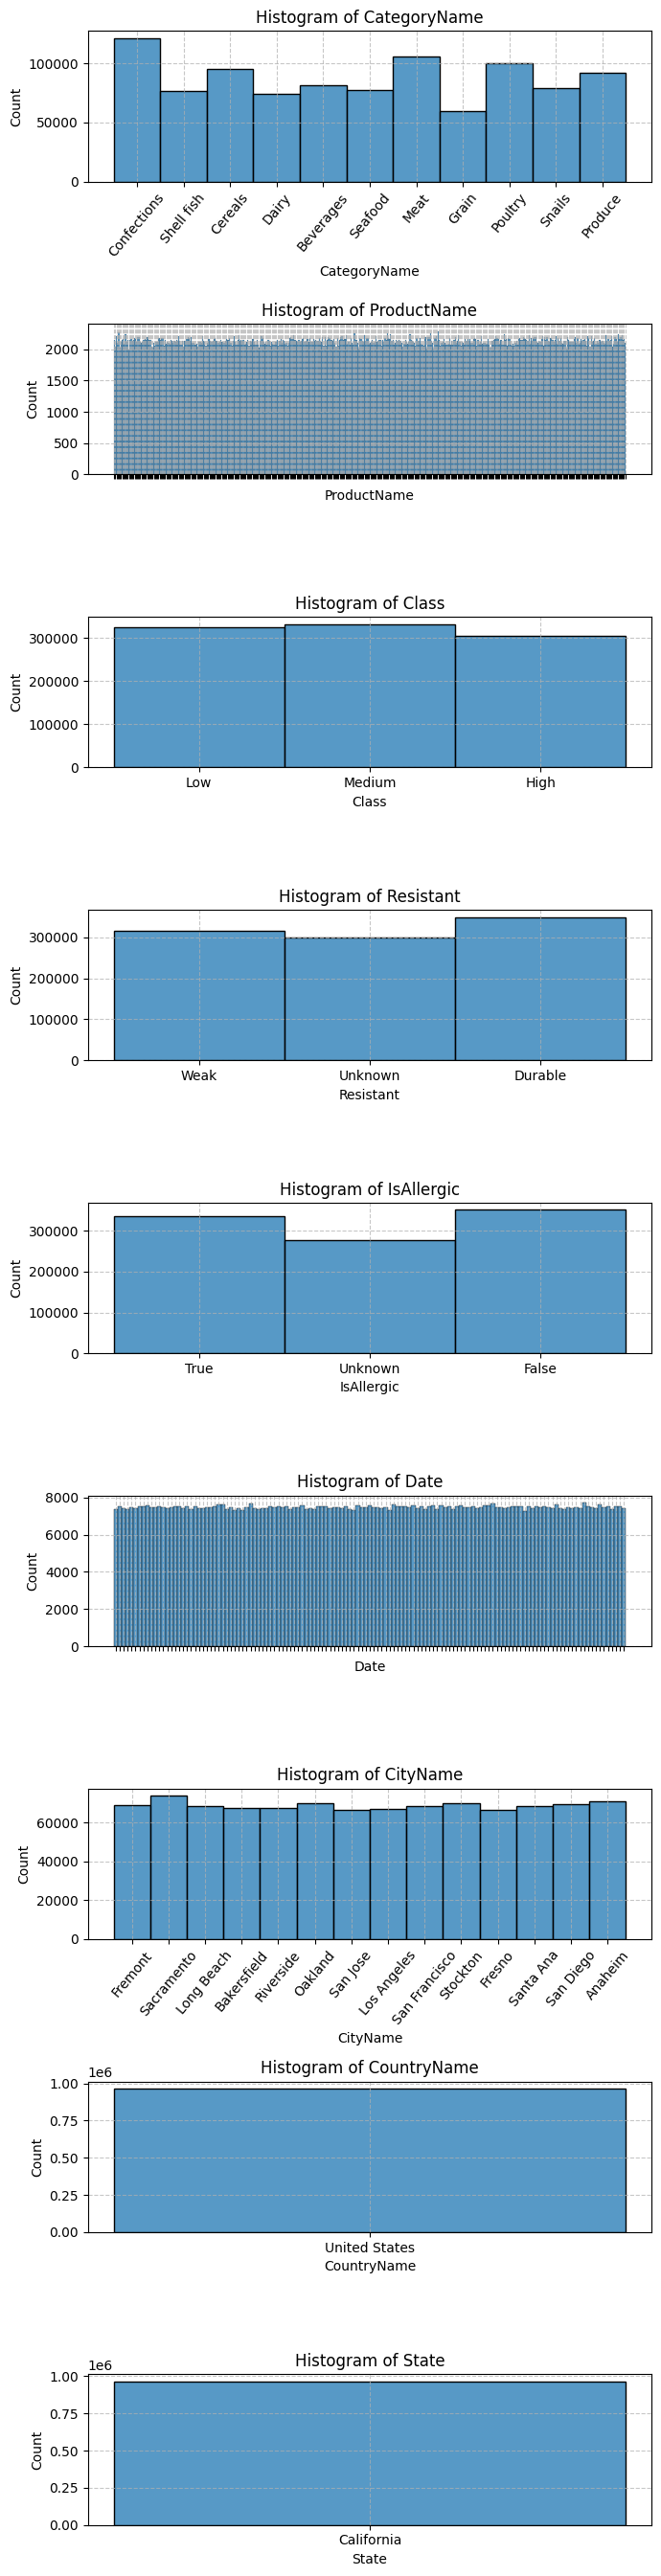

In [34]:
categoricals_variables = ['CategoryName', 'ProductName', 'Class', 'Resistant', 'IsAllergic', 'Date', 'CityName', 'CountryName', 'State']
    

def plot_categoricas(data_set, variables_categoricas):
    
    # Crear la figura con 1 columna y n filas, donde n es el número de variables categóricas.
    fig, axis = plt.subplots(len(variables_categoricas), 1, figsize=(7, len(variables_categoricas) * 3))

    # Iterar sobre cada columna categórica del DataFrame
    for i, col in enumerate(variables_categoricas):
        # Crear histograma para cada columna categórica.
        sns.histplot(ax = axis[i], data = data_set, x = col) 
        axis[i].set_title(f'Histogram of {col}')
        axis[i].grid(linestyle='--', alpha=0.7)
        
        # Rotación automática de las etiquetas del eje X si es necesario.

        category_counts = data_set[col].value_counts() # Contar las categorías en la columna.
        
        if len(category_counts) > 20: # Si hay más de 20 categorías, eliminar las etiquetas del eje X
            axis[i].set_xticklabels([])
        elif len(category_counts) >= 8:
            for label in axis[i].get_xticklabels(): # Si hay más de 10 categorías pero menos de 20, rotar las etiquetas del eje X
                label.set_rotation(50)

    plt.tight_layout()
    plt.show()

plot_categoricas(data_limpia, categoricals_variables)

#### Análisis sobre variables numéricas

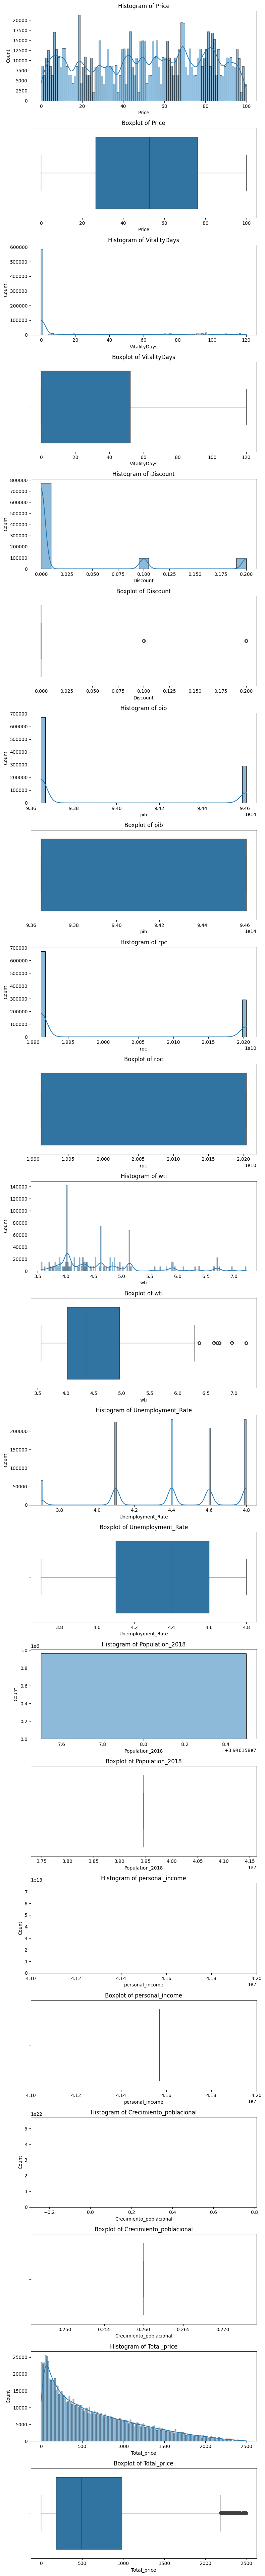

In [39]:
numericals_variables = data_limpia.select_dtypes(include = ['number']).drop(columns=['Quantity']).corr() # Con esta linea seleccionamos las columnas numericas del dataframe.

def plot_numericas(data_set, variables_numericas):
    
    # Crear la figura con 1 columnas y 2 filas por variable.
    fig, axis = plt.subplots(len(variables_numericas) * 2, 1, figsize=(8, len(variables_numericas) * 7))

    # Definir límites de los ejes x para cada par de gráficos (histograma y boxplot).
    # RECORDAR CAMBIAR LOS NOMBRES Y PONER LOS DE LAS COLUMNAS DE DF CORRESPONDIENTE.
    x_limits = {
        'personal_income': (41000000, 42000000),   # Rango para el histograma y el boxplot de columna1...
        'duration': (0, 2000),    
        'campaign': (0, 20), 
        'pdays': (0, 2000),
           
        # Añadir más columnas y rangos si es necesario...
    }

    # Iterar sobre cada columna del DataFrame
    for i, col in enumerate(variables_numericas):
        index = i * 2
        # Histograma en la primera fila
        sns.histplot(data = data_set, x = col, kde = True, ax = axis[index])
        axis[index].set_title(f'Histogram of {col}')
        
        # Establecer límites del eje x para el histograma
        if col in x_limits:
            axis[index].set_xlim(x_limits[col])  # Asigna el rango de valores personalizado al histograma

        # Boxplot en la segunda fila
        sns.boxplot(data = data_set, x = col, ax = axis[index + 1])
        axis[index + 1].set_title(f'Boxplot of {col}')
        
        # Establecer límites del eje x para el boxplot (mismo rango que el histograma)
        if col in x_limits:
            axis[index + 1].set_xlim(x_limits[col])  # Asigna el mismo rango de valores al boxplot

    plt.tight_layout()
    plt.show()

plot_numericas(data_limpia, numericals_variables)

### Paso 4: Análisis de variables multivariante

#### Análisis numérico-numérico

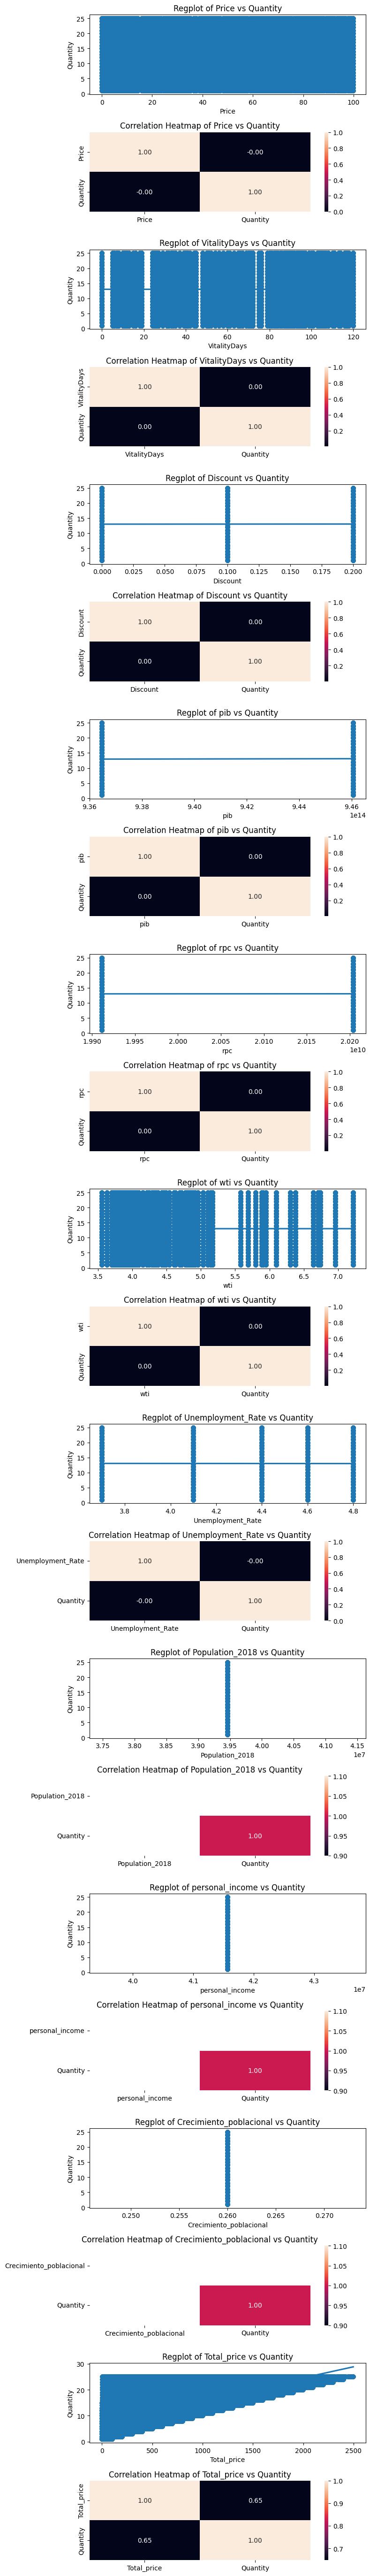

,CategoryName,ProductName,Price,Class,Resistant,IsAllergic,VitalityDays,Quantity,Discount,Date,CityName,CountryName,State,pib,rpc,wti,Unemployment_Rate,Population_2018,personal_income,Crecimiento_poblacional,Total_price
1,Confections,"Spoon - Soup, Plastic",32.442,Low,Weak,True,0.0,25,0.0,2018-01-01,Fremont,United States,California,9.364726e+14,1.991167e+10,4.628095,4.8,39461588.0,4.156992e+07,0.26,811.05
33,Confections,"Spoon - Soup, Plastic",32.442,Low,Weak,True,0.0,5,0.0,2018-01-01,Sacramento,United States,California,9.364726e+14,1.991167e+10,4.628095,4.8,39461588.0,4.156992e+07,0.26,162.21
62,Confections,"Spoon - Soup, Plastic",32.442,Low,Weak,True,0.0,21,0.2,2018-01-01,Fremont,United States,California,9.364726e+14,1.991167e+10,4.628095,4.8,39461588.0,4.156992e+07,0.26,545.03
72,Confections,"Spoon - Soup, Plastic",32.442,Low,Weak,True,0.0,4,0.0,2018-01-01,Long Beach,United States,California,9.364726e+14,1.991167e+10,4.628095,4.8,39461588.0,4.156992e+07,0.26,129.77
74,Confections,"Spoon - Soup, Plastic",32.442,Low,Weak,True,0.0,8,0.0,2018-01-01,Bakersfield,United States,California,9.364726e+14,1.991167e+10,4.628095,4.8,39461588.0,4.156992e+07,0.26,259.54


In [ ]:

numericals_variables = data_limpia.select_dtypes(include = ['number']).drop(columns=['Quantity']).columns.tolist() # Con esta linea seleccionamos las columnas numericas del dataframe.

  
def plot_numerico_numerico(data_set, variables_numericas):

    target = 'Quantity' # Recordar cambiar el target.     
    
    # Crear una figura con 1 columna y 2 filas por cada variable
    fig, axis = plt.subplots(len(variables_numericas) * 2, 1, figsize=(8, (len(variables_numericas) * 5)))

    # Crear un diagrama de dispersión múltiple                
    for i, col in enumerate(variables_numericas):

        # Regplot en la primera fila (fila 2 * i)
        sns.regplot(ax = axis[i * 2], data = data_set, x = col, y = target)
        axis[i * 2].set_title(f'Regplot of {col} vs {target}')
        
        # Heatmap en la segunda fila.
        sns.heatmap(data_set[[col, target]].corr(), annot = True, fmt = ".2f", ax = axis[i * 2 + 1], cbar = True)
        axis[i * 2 + 1].set_title(f'Correlation Heatmap of {col} vs {target}')

    plt.tight_layout()
    plt.show()

plot_numerico_numerico(data_limpia, numericals_variables)

data_limpia.head()

**Análisis de posibles relaciones entre variables numericas**

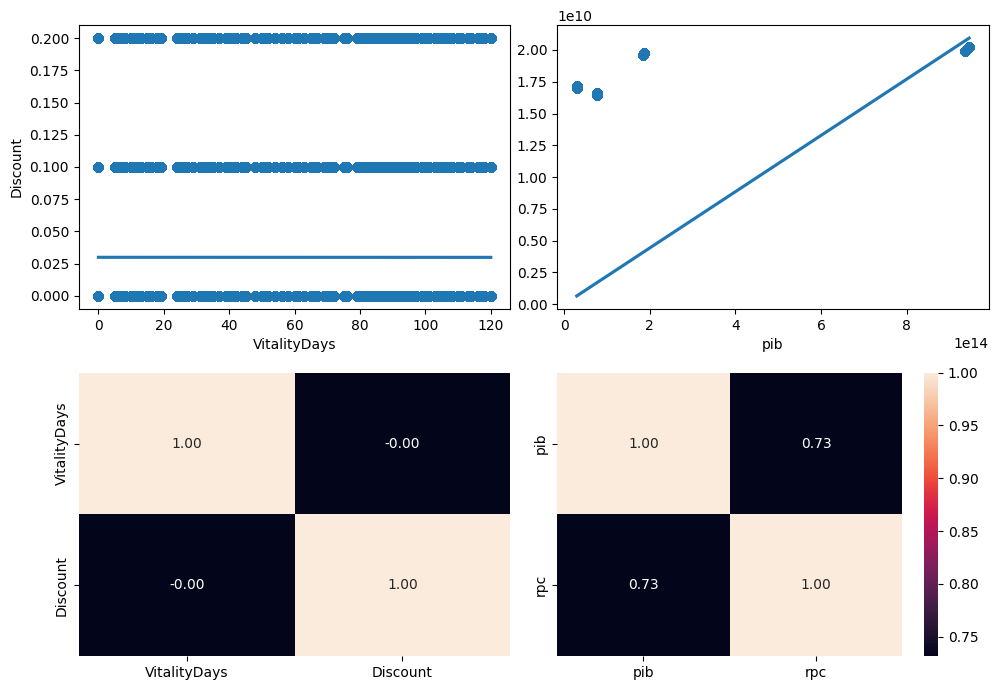

In [70]:

fig, axis = plt.subplots(2, 2, figsize = (10, 7))  

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0, 0], data = data_limpia, x = "VitalityDays", y = "Discount")
sns.heatmap(data_limpia[["VitalityDays", "Discount"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = data_limpia, x = "pib", y = "rpc").set(ylabel=None)
sns.heatmap(data_limpia[["pib", "rpc"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

plt.tight_layout()
plt.show()

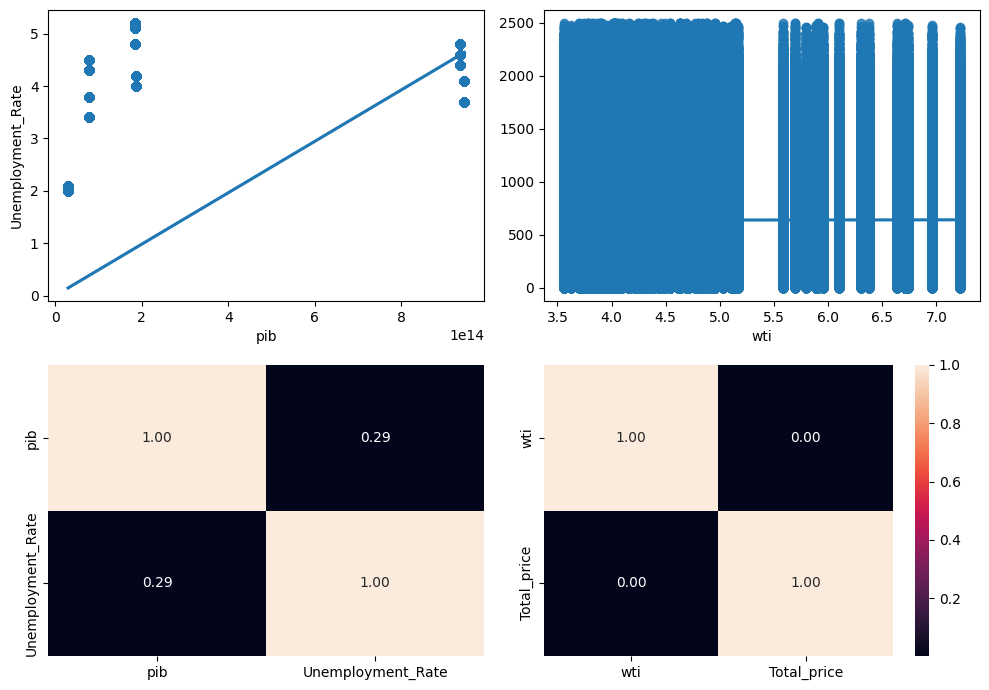

In [71]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7))  

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0, 0], data = data_limpia, x = "pib", y = "Unemployment_Rate")
sns.heatmap(data_limpia[["pib", "Unemployment_Rate"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = data_limpia, x = "wti", y = "Total_price").set(ylabel=None)
sns.heatmap(data_limpia[["wti", "Total_price"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

plt.tight_layout()
plt.show()

#### Análisis categórico-categórico

Al tratarse de un data set y un problema a resolver con una variable numerica por target, no seria de utilidad realizar ningun análisis categórico-categórico.

#### Combinaciones de la clase con varias predictoras

In [45]:
data_limpia.head()

,CategoryName,ProductName,Price,Class,Resistant,IsAllergic,VitalityDays,Quantity,Discount,Date,CityName,CountryName,State,pib,rpc,wti,Unemployment_Rate,Population_2018,personal_income,Crecimiento_poblacional,Total_price
1,Confections,"Spoon - Soup, Plastic",32.442,Low,Weak,True,0.0,25,0.0,2018-01-01,Fremont,United States,California,9.364726e+14,1.991167e+10,4.628095,4.8,39461588.0,4.156992e+07,0.26,811.05
33,Confections,"Spoon - Soup, Plastic",32.442,Low,Weak,True,0.0,5,0.0,2018-01-01,Sacramento,United States,California,9.364726e+14,1.991167e+10,4.628095,4.8,39461588.0,4.156992e+07,0.26,162.21
62,Confections,"Spoon - Soup, Plastic",32.442,Low,Weak,True,0.0,21,0.2,2018-01-01,Fremont,United States,California,9.364726e+14,1.991167e+10,4.628095,4.8,39461588.0,4.156992e+07,0.26,545.03
72,Confections,"Spoon - Soup, Plastic",32.442,Low,Weak,True,0.0,4,0.0,2018-01-01,Long Beach,United States,California,9.364726e+14,1.991167e+10,4.628095,4.8,39461588.0,4.156992e+07,0.26,129.77
74,Confections,"Spoon - Soup, Plastic",32.442,Low,Weak,True,0.0,8,0.0,2018-01-01,Bakersfield,United States,California,9.364726e+14,1.991167e+10,4.628095,4.8,39461588.0,4.156992e+07,0.26,259.54


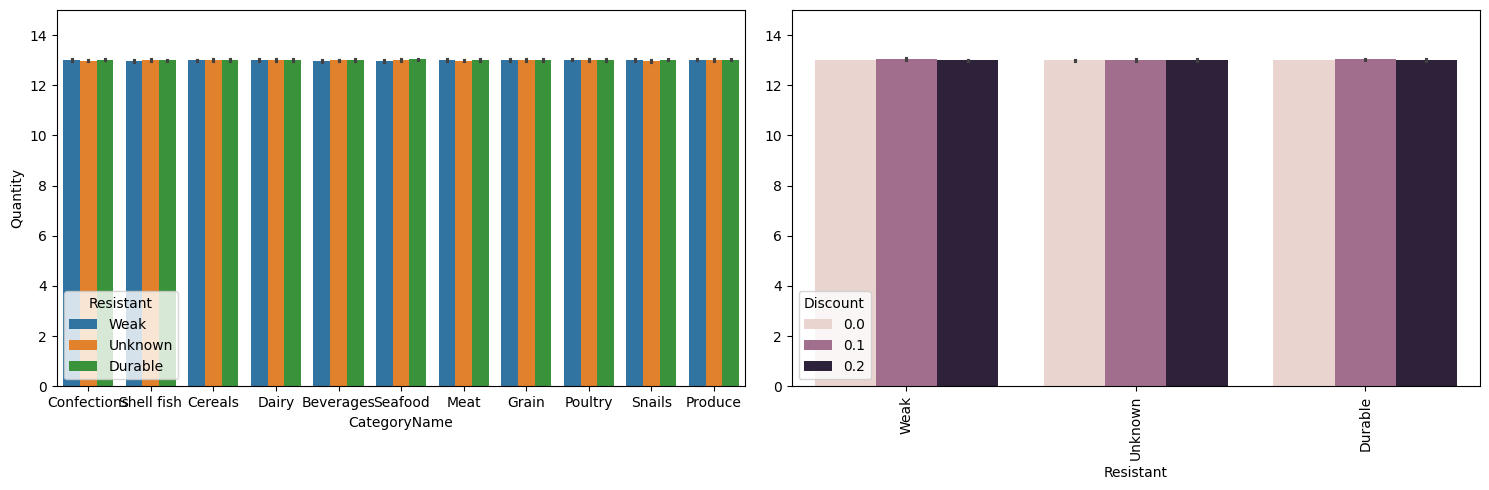

In [77]:
fig, axis = plt.subplots(figsize = (15, 5), ncols = 2)

sns.barplot(ax = axis[0], data = data_limpia, x = "CategoryName", y = 'Quantity', hue = 'Resistant')

sns.barplot(ax = axis[1], data = data_limpia, x = "Resistant", y = 'Quantity', hue = 'Discount').set(ylabel = None)
for tick in axis[1].get_xticklabels():
    tick.set_rotation(90)

axis[0].set_ylim(0, 15)
axis[1].set_ylim(0, 15)

plt.tight_layout()
plt.show()

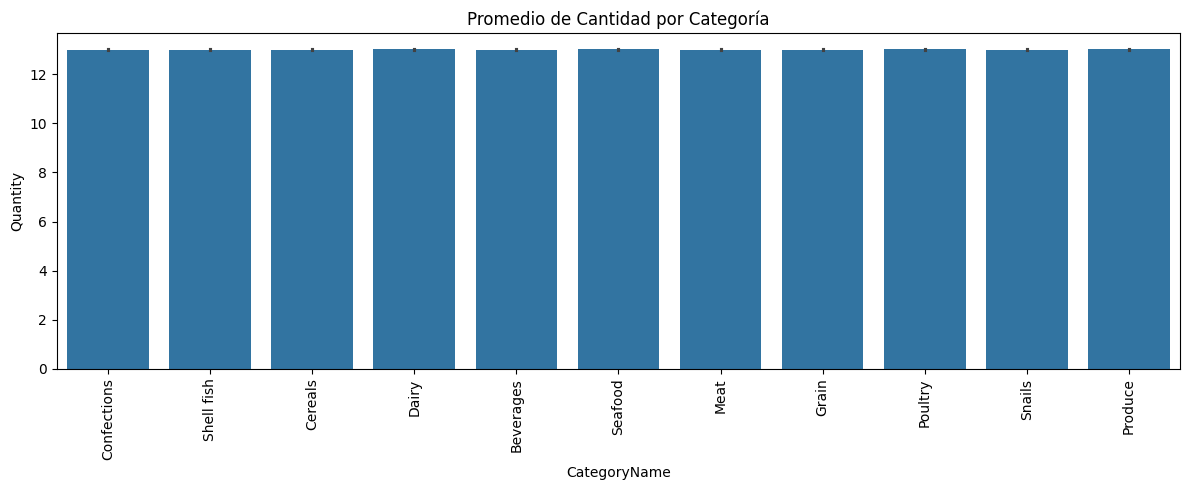

In [78]:
plt.figure(figsize=(12, 5))
sns.barplot(data=data_limpia, x='CategoryName', y='Quantity')
plt.xticks(rotation=90)
plt.title('Promedio de Cantidad por Categoría')
plt.tight_layout()
plt.show()

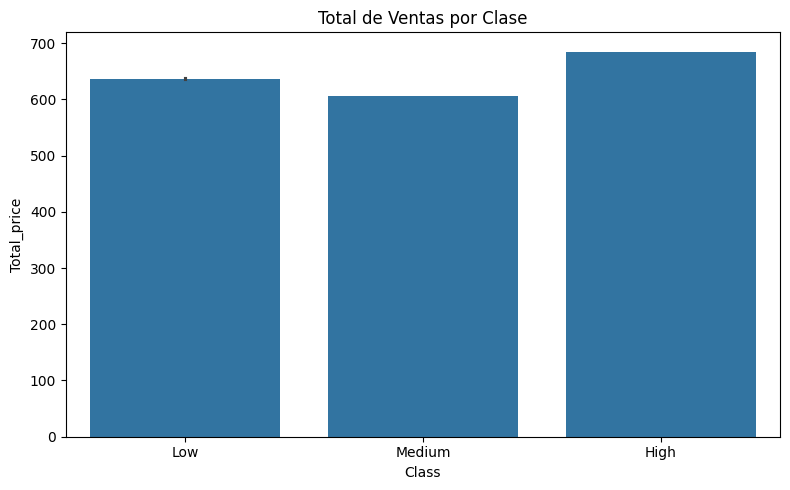

In [79]:
plt.figure(figsize=(8, 5))
sns.barplot(data=data_limpia, x='Class', y='Total_price')
plt.title('Total de Ventas por Clase')

plt.tight_layout()
plt.show()

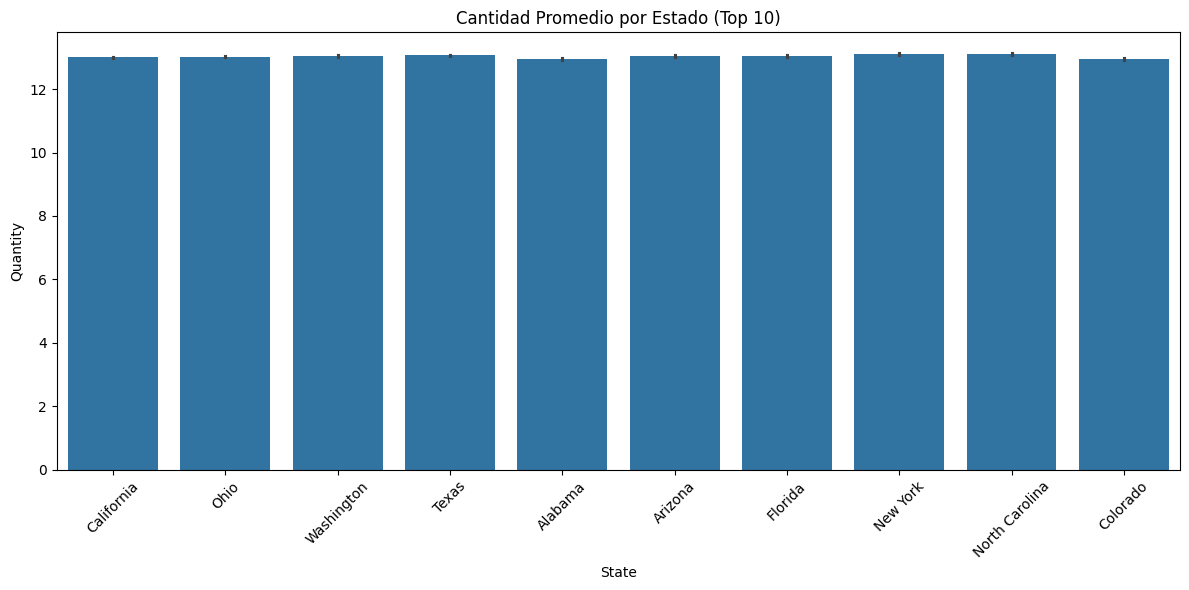

In [80]:
top_states = data_limpia['State'].value_counts().nlargest(10).index
filtered_data = data_limpia[data_limpia['State'].isin(top_states)]

plt.figure(figsize=(12, 6))
sns.barplot(data=filtered_data, x='State', y='Quantity')
plt.xticks(rotation=45)
plt.title('Cantidad Promedio por Estado (Top 10)')
plt.tight_layout()
plt.show()


#### Factorización

In [86]:
# EN EL EDA HACÉIS:

data_limpia["ProductName_n"] = pd.factorize(data_limpia["ProductName"])[0]
data_limpia["CategoryName_n"] = pd.factorize(data_limpia["CategoryName"])[0]
data_limpia["CityName_n"] = pd.factorize(data_limpia["CityName"])[0]
data_limpia["State_n"] = pd.factorize(data_limpia["State"])[0]
data_limpia["Resistant_n"] = pd.factorize(data_limpia["Resistant"])[0]
data_limpia["Class_n"] = pd.factorize(data_limpia["Class"])[0]
data_limpia["IsAllergic_n"] = pd.factorize(data_limpia["IsAllergic"])[0]

ProductName_transformation_rules = {row["ProductName"]: row["ProductName_n"] for _, row in data_limpia[["ProductName", "ProductName_n"]].drop_duplicates().iterrows()}
CategoryName_transformation_rules = {row["CategoryName"]: row["CategoryName_n"] for _, row in data_limpia[["CategoryName", "CategoryName_n"]].drop_duplicates().iterrows()}
CityName_transformation_rules = {row["CityName"]: row["CityName_n"] for _, row in data_limpia[["CityName", "CityName_n"]].drop_duplicates().iterrows()}
State_transformation_rules = {row["State"]: row["State_n"] for _, row in data_limpia[["State", "State_n"]].drop_duplicates().iterrows()}
Resistant_transformation_rules = {row["Resistant"]: row["Resistant_n"] for _, row in data_limpia[["Resistant", "Resistant_n"]].drop_duplicates().iterrows()}
Class_transformation_rules = {row["Class"]: row["Class_n"] for _, row in data_limpia[["Class", "Class_n"]].drop_duplicates().iterrows()}
IsAllergic_transformation_rules = {row["IsAllergic"]: row["IsAllergic_n"] for _, row in data_limpia[["IsAllergic", "IsAllergic_n"]].drop_duplicates().iterrows()}

# diccionario
# {
#     "male": 0,
#     "female": 1
# }

transformation_rules_path = os.path.join(current_dir, '../data/jsons/transformation_rules.json')

transformation_rules = {
    "ProductName_rules": ProductName_transformation_rules,
    "CategoryName_rules": CategoryName_transformation_rules,
    "CityName_rules": CityName_transformation_rules,
    "State_rules": State_transformation_rules,
    "Resistant_rules": Resistant_transformation_rules,
    "Class_rules": Class_transformation_rules,
    "IsAllergic_rules": IsAllergic_transformation_rules
}

with open(transformation_rules_path, "w") as f:
  json.dump(transformation_rules, f)


TypeError: keys must be str, int, float, bool or None, not int64

##### Análisis de correlaciones. 

In [ ]:
def plot_matriz_correlacion(data_set):

    corr_matrix = data_set.select_dtypes(include = ['number']).corr() # Con esta linea seleccionamos las columnas numericas del dataframe.

    plt.figure(figsize=(12, 8))
    sns.heatmap(corr_matrix, annot = True, fmt = ".2f", linewidths = 0.5, cmap = "coolwarm")

    plt.tight_layout()
    plt.show()

plot_matriz_correlacion(data_limpia)


#### Una vez analizada la correlación, analicemos los dos casos vistos para corroborar la teoría:

In [ ]:
# Una vez analizada la correlación, analicemos los dos casos vistos para corroborar la teoría:

fig, axis = plt.subplots(figsize = (10, 5), ncols = 2)

sns.regplot(ax = axis[0], data = data_limpia, x = "Outcome", y = "Glucose", scatter_kws={'edgecolor': 'k', 'alpha': 0.6})
sns.regplot(ax = axis[1], data = data_limpia, x = "Age", y = "Pregnancies", scatter_kws={'edgecolor': 'k', 'alpha': 0.6})
axis[0].grid(linestyle='--', alpha=0.7)
axis[1].grid(linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

#### Pairpolot

In [ ]:
# graficar el pairplot.

sns.pairplot(data = data_limpia)

plt.tight_layout()
plt.show()

### Paso 5: Ingeniería de características

### Valores faltantes

In [ ]:
total_data["Embarked"].fillna(total_data["Embarked"].mode()[0], inplace = True) # RECORDANDO QUE MODE PARA LAS VARIABLES CATEGORICAS

total_data["Fare"].fillna(total_data["Fare"].mean(), inplace = True) # Y MEDIA PARA LAS VARIABLES NUMERICAS

total_data.isnull().sum()

#### Análisis de outliers

In [ ]:
data_limpia.describe()

#### Boxplots para visualizar los outliers

In [ ]:
def plot_boxplots_numericos(data_set):
    # Esta variable filtrará el data frame y me devolverá los nombres de las columnas numericas. 
    column_filter_numericas = data_set.select_dtypes(include = 'number').drop(columns = [''], errors='ignore').columns # Si quiero eliminar alguna columna rellenar la parte de drop.
    
    # Crear el gráfico con subgráficas en una sola columna
    fig, axis = plt.subplots(len(column_filter_numericas), 1, figsize=(7, len(column_filter_numericas) * 3))
     
    # Si solo hay una columna, `axis` no es un array, lo convertimos en uno
    if len(column_filter_numericas) == 1:
        axis = [axis]
    
    # Generar los boxplots para cada columna numérica.
    for i, columna in enumerate(column_filter_numericas):
        sns.boxplot(ax = axis[i], data = data_set, y = columna)
        axis[i].set_title(f'Boxplot de {columna}')
    
    plt.tight_layout()
    plt.show()

plot_boxplots_numericos(data_limpia)

#### Separación del Dataset en uno con outliers y otro sin outliers

In [ ]:
# Separar mi data frame en uno con outliers y otro sin outliers.
# Funcion que remplaza los outliers y me devuelve una copia del data frame sin outliers, pero que ademas tambien me devuelve la lista de 
# limites de outliers para luego merterlas en un diccionario.

data_limpia_con_outliers = data_limpia.copy()
data_limpia_sin_outliers = data_limpia.copy()

def replace_outliers_from_column(column, df):
  column_stats = df[column].describe()
  column_iqr = column_stats["75%"] - column_stats["25%"]
  upper_limit = column_stats["75%"] + 1.5 * column_iqr
  lower_limit = column_stats["25%"] - 1.5 * column_iqr
  if lower_limit < 0: lower_limit = 0
  
  # Replace upper outliers
  df[column] = df[column].apply(lambda x: x if (x <= upper_limit) else upper_limit)
  # Replace lower outliers
  df[column] = df[column].apply(lambda x: x if (x >= lower_limit) else lower_limit)

  return df.copy(), [lower_limit, upper_limit]


# Crear diccionario con los limites de outliers para poder guardarlos y a la vez llamar a la funcion para que convierta la copia del 
# dataframe a sin outliers y tener las dos variables con cada dataframe (el con y el sin) disponibles para los siguientes pasos. 

outliers_dict = {}

for column in ['Pregnancies',	'Glucose',	'BloodPressure',	'SkinThickness',	'Insulin',	'BMI',	'DiabetesPedigreeFunction',	'Age'	]: # RECORDAR CAMBIAR LAS COLUMNAS. 
  data_limpia_sin_outliers, limits_list = replace_outliers_from_column(column, data_limpia_sin_outliers)
  outliers_dict[column] = limits_list

# Guardar el diccionario en un archivo json.  

with open("outliers_replacement.json", "w") as f:
    json.dump(outliers_dict, f)

#### Inferencia de nuevas características

In [ ]:
# Averiguar como hacer y crear Date y en que rangos, etc.. 

#### Escalado de valores

In [ ]:
# Escalado de valores:

# Separar 'x_con_outliers' y 'x_sin_outliers' e 'Y' en train y test. (resultante 6 excels). 

num_variables = data_limpia.select_dtypes(include = 'number').drop(columns = ['Outcome'], errors='ignore').columns # Si quiero eliminar alguna columna rellenar la parte de drop.

# Dividimos el conjunto de datos en muestras de train y test
X_con_outliers = data_limpia_con_outliers.drop("Outcome", axis = 1)[num_variables]
X_sin_outliers = data_limpia_sin_outliers.drop("Outcome", axis = 1)[num_variables]
y = data_limpia_con_outliers["Outcome"]

X_train_con_outliers, X_test_con_outliers, y_train, y_test = train_test_split(X_con_outliers, y, test_size = 0.2, random_state = 42)
X_train_sin_outliers, X_test_sin_outliers = train_test_split(X_sin_outliers, test_size = 0.2, random_state = 42)

# GUARDAR LOS DATASETS
X_train_con_outliers.to_excel("/Users/julian/Desktop/vs code/STREAMLIT_Project_26_Julian_Lopez/ML-WEBAPP-USING-STREAMLIT_Project_26_Julian_Lopez/data/Excels/X_train_con_outliers.xlsx", index = False)
X_train_sin_outliers.to_excel("/Users/julian/Desktop/vs code/STREAMLIT_Project_26_Julian_Lopez/ML-WEBAPP-USING-STREAMLIT_Project_26_Julian_Lopez/data/Excels/X_train_sin_outliers.xlsx", index = False)
X_test_con_outliers.to_excel("/Users/julian/Desktop/vs code/STREAMLIT_Project_26_Julian_Lopez/ML-WEBAPP-USING-STREAMLIT_Project_26_Julian_Lopez/data/Excels/X_test_con_outliers.xlsx", index = False)
X_test_sin_outliers.to_excel("/Users/julian/Desktop/vs code/STREAMLIT_Project_26_Julian_Lopez/ML-WEBAPP-USING-STREAMLIT_Project_26_Julian_Lopez/data/Excels/X_test_sin_outliers.xlsx", index = False)
y_train.to_excel("/Users/julian/Desktop/vs code/STREAMLIT_Project_26_Julian_Lopez/ML-WEBAPP-USING-STREAMLIT_Project_26_Julian_Lopez/data/Excels/y_train.xlsx", index = False)
y_test.to_excel("/Users/julian/Desktop/vs code/STREAMLIT_Project_26_Julian_Lopez/ML-WEBAPP-USING-STREAMLIT_Project_26_Julian_Lopez/data/Excels/y_test.xlsx", index = False)

X_train_con_outliers.head()

##### Normalización

In [ ]:
# Normalización:

from sklearn.preprocessing import StandardScaler
import pickle

num_variables = data_limpia.select_dtypes(include = 'number').drop(columns = ['Outcome'], errors='ignore').columns # Si quiero eliminar alguna columna rellenar la parte de drop.

### NORMALIZAMOS EL DATAFRAME CON OUTLIERS Y LO GUARDAMOS
normalizador_con_outliers = StandardScaler()
normalizador_con_outliers.fit(X_train_con_outliers)   

with open("/Users/julian/Desktop/vs code/STREAMLIT_Project_26_Julian_Lopez/ML-WEBAPP-USING-STREAMLIT_Project_26_Julian_Lopez/data/Models(Norm_scal)/normalizador_con_outliers.pkl", "wb") as file: # Guardar el Normalizador. 
  pickle.dump(normalizador_con_outliers, file)

X_train_con_outliers_norm = normalizador_con_outliers.transform(X_train_con_outliers)
X_train_con_outliers_norm = pd.DataFrame(X_train_con_outliers_norm, index = X_train_con_outliers.index, columns = num_variables)

X_test_con_outliers_norm = normalizador_con_outliers.transform(X_test_con_outliers)
X_test_con_outliers_norm = pd.DataFrame(X_test_con_outliers_norm, index = X_test_con_outliers.index, columns = num_variables)

# GUARDAR LOS DATASETS
X_train_con_outliers_norm.to_excel("/Users/julian/Desktop/vs code/STREAMLIT_Project_26_Julian_Lopez/ML-WEBAPP-USING-STREAMLIT_Project_26_Julian_Lopez/data/Excels/X_train_con_outliers_norm.xlsx", index = False)
X_test_con_outliers_norm.to_excel("/Users/julian/Desktop/vs code/STREAMLIT_Project_26_Julian_Lopez/ML-WEBAPP-USING-STREAMLIT_Project_26_Julian_Lopez/data/Excels/X_test_con_outliers_norm.xlsx", index = False)
### NORMALIZAMOS EL DATAFRAME SIN OUTLIERS Y LO GUARDAMOS
normalizador_sin_outliers = StandardScaler()
normalizador_sin_outliers.fit(X_train_sin_outliers)

with open("/Users/julian/Desktop/vs code/STREAMLIT_Project_26_Julian_Lopez/ML-WEBAPP-USING-STREAMLIT_Project_26_Julian_Lopez/data/Models(Norm_scal)/normalizador_sin_outliers.pkl", "wb") as file: # Guardar el Normalizador. 
  pickle.dump(normalizador_sin_outliers, file)

X_train_sin_outliers_norm = normalizador_sin_outliers.transform(X_train_sin_outliers)
X_train_sin_outliers_norm = pd.DataFrame(X_train_sin_outliers_norm, index = X_train_sin_outliers.index, columns = num_variables)

X_test_sin_outliers_norm = normalizador_sin_outliers.transform(X_test_sin_outliers)
X_test_sin_outliers_norm = pd.DataFrame(X_test_sin_outliers_norm, index = X_test_sin_outliers.index, columns = num_variables)

# GUARDAR LOS DATASETS
X_train_sin_outliers_norm.to_excel("/Users/julian/Desktop/vs code/STREAMLIT_Project_26_Julian_Lopez/ML-WEBAPP-USING-STREAMLIT_Project_26_Julian_Lopez/data/Excels/X_train_sin_outliers_norm.xlsx", index = False)
X_test_sin_outliers_norm.to_excel("/Users/julian/Desktop/vs code/STREAMLIT_Project_26_Julian_Lopez/ML-WEBAPP-USING-STREAMLIT_Project_26_Julian_Lopez/data/Excels/X_test_sin_outliers_norm.xlsx", index = False)

X_train_con_outliers_norm.head()

##### Escalado Mínimo-Máximo

In [ ]:
# Escalado Mínimo-Máximo:

from sklearn.preprocessing import MinMaxScaler

num_variables = data_limpia.select_dtypes(include = 'number').drop(columns = ['Outcome'], errors='ignore').columns # Si quiero eliminar alguna columna rellenar la parte de drop.

### ESCALAMOS EL DATAFRAME CON OUTLIERS Y LO GUARDAMOS
scaler_con_outliers = MinMaxScaler()
scaler_con_outliers.fit(X_train_con_outliers)

with open("/Users/julian/Desktop/vs code/STREAMLIT_Project_26_Julian_Lopez/ML-WEBAPP-USING-STREAMLIT_Project_26_Julian_Lopez/data/Models(Norm_scal)/scaler_con_outliers.pkl", "wb") as file: # Guardar el Escaler. 
  pickle.dump(scaler_con_outliers, file)
  
X_train_con_outliers_scal = scaler_con_outliers.transform(X_train_con_outliers)
X_train_con_outliers_scal = pd.DataFrame(X_train_con_outliers_scal, index = X_train_con_outliers.index, columns = num_variables)

X_test_con_outliers_scal = scaler_con_outliers.transform(X_test_con_outliers)
X_test_con_outliers_scal = pd.DataFrame(X_test_con_outliers_scal, index = X_test_con_outliers.index, columns = num_variables)

# GUARDAR LOS DATASETS
X_train_con_outliers_scal.to_excel("/Users/julian/Desktop/vs code/STREAMLIT_Project_26_Julian_Lopez/ML-WEBAPP-USING-STREAMLIT_Project_26_Julian_Lopez/data/Excels/X_train_con_outliers_scal.xlsx", index = False)
X_test_con_outliers_scal.to_excel("/Users/julian/Desktop/vs code/STREAMLIT_Project_26_Julian_Lopez/ML-WEBAPP-USING-STREAMLIT_Project_26_Julian_Lopez/data/Excels/X_test_con_outliers_scal.xlsx", index = False)

### ESCALAMOS EL DATAFRAME SIN OUTLIERS Y LO GUARDAMOS
scaler_sin_outliers = MinMaxScaler()
scaler_sin_outliers.fit(X_train_sin_outliers)

with open("/Users/julian/Desktop/vs code/STREAMLIT_Project_26_Julian_Lopez/ML-WEBAPP-USING-STREAMLIT_Project_26_Julian_Lopez/data/Models(Norm_scal)/scaler_sin_outliers.pkl", "wb") as file: # Guardar el Escaler. 
  pickle.dump(scaler_sin_outliers, file)

X_train_sin_outliers_scal = scaler_sin_outliers.transform(X_train_sin_outliers)
X_train_sin_outliers_scal = pd.DataFrame(X_train_sin_outliers_scal, index = X_train_sin_outliers.index, columns = num_variables)

X_test_sin_outliers_scal = scaler_sin_outliers.transform(X_test_sin_outliers)
X_test_sin_outliers_scal = pd.DataFrame(X_test_sin_outliers_scal, index = X_test_sin_outliers.index, columns = num_variables)

# GUARDAR LOS DATASETS
X_train_sin_outliers_scal.to_excel("/Users/julian/Desktop/vs code/STREAMLIT_Project_26_Julian_Lopez/ML-WEBAPP-USING-STREAMLIT_Project_26_Julian_Lopez/data/Excels/X_train_sin_outliers_scal.xlsx", index = False)
X_test_sin_outliers_scal.to_excel("/Users/julian/Desktop/vs code/STREAMLIT_Project_26_Julian_Lopez/ML-WEBAPP-USING-STREAMLIT_Project_26_Julian_Lopez/data/Excels/X_test_sin_outliers_scal.xlsx", index = False)

X_train_con_outliers_scal.head()

### Feature Selection

In [ ]:
from sklearn.feature_selection import f_classif, SelectKBest

# Con un valor de k = 4 decimos implícitamente que queremos eliminar 1 característica1 del conjunto de datos.

selection_model = SelectKBest(f_classif, k = 7)
selection_model.fit(X_train_con_outliers, y_train)

ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train_con_outliers), columns = X_train_con_outliers.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test_con_outliers), columns = X_test_con_outliers.columns.values[ix])

# GUARDO X_train_sel.columns

columns_list = X_train_sel.columns.tolist() # Convierte el objeto Index a una lista.tolist()

with open("feature_selection_k_7.json", "w") as f:
  json.dump(columns_list, f)

X_train_sel.head()

# GUARDAR LOS DATASETS
X_train_sel.to_excel("/Users/julian/Desktop/vs code/STREAMLIT_Project_26_Julian_Lopez/ML-WEBAPP-USING-STREAMLIT_Project_26_Julian_Lopez/data/Excels/X_train_sel_k7.xlsx", index = False)
X_test_sel.to_excel("/Users/julian/Desktop/vs code/STREAMLIT_Project_26_Julian_Lopez/ML-WEBAPP-USING-STREAMLIT_Project_26_Julian_Lopez/data/Excels/X_test_sel_k7.xlsx", index = False)